In [11]:
cd ThinkBayes2-master/code/


SyntaxError: invalid syntax (<ipython-input-11-746b21419331>, line 1)

In [12]:
%matplotlib inline

1. Choose a representation for the hypotheses
2. Choose a representation for the data. 
3. Write the likelihood function. 

In [4]:
# %load dice.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function, division

from thinkbayes2 import Suite


class Dice(Suite):
    """Represents hypotheses about which die was rolled."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: integer number of sides on the die
        data: integer die roll
        """
        if hypo < data:
            return 0
        else:
            return 1.0/hypo


def main():
    
    # represent hypotheses using integers
    suite = Dice([4, 6, 8, 12, 20])

    
    suite.Update(6)
    print('After one 6')
    suite.Print()

    for roll in [4, 8, 7, 7, 2]:
        suite.Update(roll)

    print('After more rolls')
    suite.Print()


if __name__ == '__main__':
    main()


After one 6
4 0.0
6 0.3921568627450981
8 0.29411764705882354
12 0.19607843137254904
20 0.11764705882352944
After more rolls
4 0.0
6 0.0
8 0.9158452719690099
12 0.08040342579700499
20 0.0037513022339850668


In [6]:
help(Suite)

Help on class Suite in module thinkbayes2:

class Suite(Pmf)
 |  Represents a suite of hypotheses and their probabilities.
 |  
 |  Method resolution order:
 |      Suite
 |      Pmf
 |      _DictWrapper
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  Likelihood(self, data, hypo)
 |      Computes the likelihood of the data under the hypothesis.
 |      
 |      hypo: some representation of the hypothesis
 |      data: some representation of the data
 |  
 |  LogLikelihood(self, data, hypo)
 |      Computes the log likelihood of the data under the hypothesis.
 |      
 |      hypo: some representation of the hypothesis
 |      data: some representation of the data
 |  
 |  LogUpdate(self, data)
 |      Updates a suite of hypotheses based on new data.
 |      
 |      Modifies the suite directly; if you want to keep the original, make
 |      a copy.
 |      
 |      Note: unlike Update, LogUpdate does not normalize.
 |      
 |      Args:
 |          data: any representa

<b> The Locamotive Problem </b>

1. What did we know about N (number of locamotives) before we saw the data?

In [8]:
# %load train.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

from dice import Dice
import thinkplot


class Train(Dice):
    """Represents hypotheses about how many trains the company has.

    The likelihood function for the train problem is the same as
    for the Dice problem.
    """


def main():
    # Prior probabilities
    hypos = range(1, 1001)
    suite = Train(hypos)

    suite.Update(60)
    print(suite.Mean())

    thinkplot.PrePlot(1)
    thinkplot.Pmf(suite)
    thinkplot.Save(root='train1',
                   xlabel='Number of trains',
                   ylabel='Probability',
                   formats=['pdf', 'eps'])


if __name__ == '__main__':
    main()


333.41989326371095


No handles with labels found to put in legend.


Writing train1.pdf
Writing train1.eps


<Figure size 576x432 with 0 Axes>

In [13]:
# %load train3.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import thinkbayes2
import thinkplot

from dice import Dice


class Train(Dice):
    """Represents hypotheses about how many trains the company has."""


class Train2(Dice):
    """Represents hypotheses about how many trains the company has."""

    def __init__(self, hypos, alpha=1.0):
        """Initializes the hypotheses with a power law distribution.

        hypos: sequence of hypotheses
        alpha: parameter of the power law prior
        """
        thinkbayes2.Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()


def MakePosterior(high, dataset, constructor):
    """Makes and updates a Suite.

    high: upper bound on the range of hypotheses
    dataset: observed data to use for the update
    constructor: function that makes a new suite

    Returns: posterior Suite
    """
    hypos = range(1, high+1)
    suite = constructor(hypos)
    suite.name = str(high)

    for data in dataset:
        suite.Update(data)

    return suite


def ComparePriors():
    """Runs the analysis with two different priors and compares them."""
    dataset = [60]
    high = 1000

    thinkplot.Clf()
    thinkplot.PrePlot(num=2)

    constructors = [Train, Train2]
    labels = ['uniform', 'power law']

    for constructor, label in zip(constructors, labels):
        suite = MakePosterior(high, dataset, constructor)
        suite.name = label
        thinkplot.Pmf(suite)

    thinkplot.Save(root='train4',
                xlabel='Number of trains',
                ylabel='Probability')

def main():
    ComparePriors()

    dataset = [30, 60, 90]

    thinkplot.Clf()
    thinkplot.PrePlot(num=3)

    for high in [500, 1000, 2000]:
        suite = MakePosterior(high, dataset, Train2)
        print(high, suite.Mean())

    thinkplot.Save(root='train3',
                   xlabel='Number of trains',
                   ylabel='Probability')

    interval = suite.Percentile(5), suite.Percentile(95)
    print(interval)

    cdf = thinkbayes2.Cdf(suite)
    interval = cdf.Percentile(5), cdf.Percentile(95)
    print(interval)


if __name__ == '__main__':
    main()


No handles with labels found to put in legend.


Writing train4.pdf
Writing train4.eps
500 130.70846986256004
1000 133.2752313750312
2000 133.99746308073065


No handles with labels found to put in legend.


Writing train3.pdf
Writing train3.eps
(91, 243)
(91, 243)


<Figure size 576x432 with 0 Axes>

posterior mean 129.97584542536543


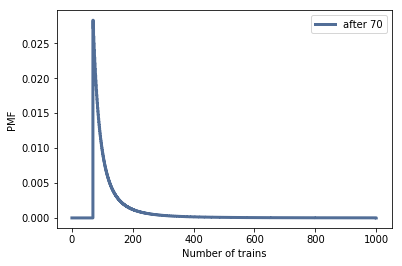

<Figure size 576x432 with 0 Axes>

In [15]:
# %load train4_soln.py
"""This file contains code for use with "Think Bayes",
by Allen B. Downey, available from greenteapress.com

Copyright 2012 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function, division

from dice import Dice
import thinkplot


class Train(Dice):
    """Represents hypotheses about how many trains the company has.

    The likelihood function for the train problem is the same as
    for the Dice problem.
    """
    def Likelihood(self, data, hypo):
        N = hypo
        k, m = data
        if N < m:
            return 0

        return m ** (k-1) / N**k


def main():
    hypos = range(1, 1001)
    suite = Train(hypos)

    data = 3, 70
    suite.Update(data)
    print('posterior mean', suite.Mean())

    thinkplot.Pmf(suite, label='after 70')
    thinkplot.Show(xlabel='Number of trains',
                   ylabel='PMF')


if __name__ == '__main__':
    main()
